In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
items=pd.read_csv("items.csv")
shops=pd.read_csv("shops.csv")
categories=pd.read_csv("item_categories.csv")
sales=pd.read_csv("sales_train.csv")
test=pd.read_csv("test.csv")

In [16]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# 1. DATA CLEANING

**NEGATIVE VALUES**

In [34]:
sales.describe()
#item_price and item_cnt_day has negative values
sales = sales[sales['item_price'] > 0]
sales = sales[sales['item_cnt_day'] > 0]

In [33]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894668e+02,1.248337e+00
std,9.422951e+00,1.622543e+01,6.324396e+03,1.727499e+03,2.619586e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


**DUPLICATE VALUES**

In [42]:
duplicates = len(items['item_name']) - len(np.unique(items['item_name']))
print("Item duplicates: ", duplicates)
duplicates = len(items['item_id']) - len(np.unique(items['item_id']))
print("Item id duplicates:", duplicates)

duplicates = len(shops['shop_name']) - len(np.unique(shops['shop_name']))
print("Shop duplicates: ", duplicates)
duplicates = len(shops['shop_id']) - len(np.unique(shops['shop_id']))
print("Shop id duplicates:", duplicates)

duplicates = len(categories['item_category_name']) - len(np.unique(categories['item_category_name']))
print("Category duplicates: ", duplicates)
duplicates = len(categories['item_category_id']) - len(np.unique(categories['item_category_id']))
print("Category id duplicates:", duplicates)

Item duplicates:  0
Item id duplicates: 0
Shop duplicates:  0
Shop id duplicates: 0
Category duplicates:  0
Category id duplicates: 0


**EXTREME VALUES - OUTLIERS**

<AxesSubplot:>

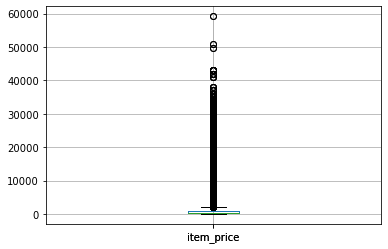

In [47]:
sales.boxplot(column='item_price')
sales = sales[sales['item_price'] < 300000]
sales.boxplot(column='item_price')

<AxesSubplot:>

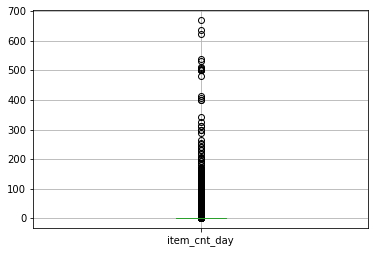

In [51]:
#sales.boxplot(column='item_cnt_day')
sales = sales[sales['item_cnt_day'] < 1000]
sales.boxplot(column='item_cnt_day')

**MISSING VALUES**

In [58]:
sales.isna().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [62]:
sales.isnull().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [59]:
shops.isna().sum(axis=0)

shop_name    0
shop_id      0
dtype: int64

In [63]:
shops.isnull().sum(axis=0)

shop_name    0
shop_id      0
dtype: int64

In [60]:
categories.isna().sum(axis=0)

item_category_name    0
item_category_id      0
dtype: int64

In [64]:
categories.isnull().sum(axis=0)

item_category_name    0
item_category_id      0
dtype: int64

In [61]:
items.isna().sum(axis=0)

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [65]:
items.isnull().sum(axis=0)

item_name           0
item_id             0
item_category_id    0
dtype: int64

# 2. AGGREGATION

In [88]:
from itertools import product
import time
ts = time.time()
matrix = []
cols  = ["date_block_num", "shop_id", "item_id"]
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )

matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix["date_block_num"] = matrix["date_block_num"].astype(np.int8)
matrix["shop_id"] = matrix["shop_id"].astype(np.int8)
matrix["item_id"] = matrix["item_id"].astype(np.int16)
matrix.sort_values( cols, inplace = True )
time.time()- ts

12.175711393356323

In [84]:
matrix

,date_block_num,shop_id,item_id
139255,0,0,19
141495,0,0,27
144968,0,0,28
142661,0,0,29
138947,0,0,32
...,...,...,...
10768834,33,59,22162
10769024,33,59,22163
10769690,33,59,22164
10771216,33,59,22166


In [89]:
ts = time.time()
group = sales.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)
time.time() - ts

4.551071643829346

In [85]:
group

,date_block_num,shop_id,item_id,item_cnt_month
0,33,2,31,1.0
1,33,2,486,3.0
2,33,2,787,1.0
3,33,2,794,1.0
4,33,2,968,1.0
...,...,...,...,...
31526,33,59,22087,6.0
31527,33,59,22088,2.0
31528,33,59,22091,1.0
31529,33,59,22100,1.0


In [90]:
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_avg_item_cnt


30.165115118026733

In [92]:
group

,date_block_num,item_id,date_item_avg_item_cnt
0,0,19,0.000000
1,0,27,0.000000
2,0,28,0.000000
3,0,29,0.000000
4,0,32,0.000000
...,...,...,...
233907,33,22162,0.227295
233908,33,22163,0.590820
233909,33,22164,0.340820
233910,33,22166,0.250000


# 3. FEATURE ENGINEERING

Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.
The simplest approach is to predict the value at the next time (t+1) given the value at the previous time (t-1). The supervised learning problem with shifted values looks as follows:

In [76]:
# Define a lag feature function
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

# 4 EXPLAROTAY DATA ANALYSIS

In [66]:
def getSalesForShop(id):
    sales_shop = sales[sales["shop_id"] == id]
    sold_each_month = sales_shop.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForItem(id):
    sales_item = sales[sales["item_id"] == id]
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForShopAndItem(shop_id, item_id):
    sales_shop_item = sales[(sales["shop_id"] == shop_id) & (sales["item_id"] == item_id)]
    sold_each_month = sales_shop_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForItemCategory(category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["item_category_id"] == category_id)]
    sold_each_month = merged_new.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getSalesForShopAndItemCategory(shop_id, category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["shop_id"] == shop_id) & (merged["item_category_id"] == category_id)]
    sold_each_month = merged_new.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

def getTotalSales():
    sales_item = sales
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

<BarContainer object of 34 artists>

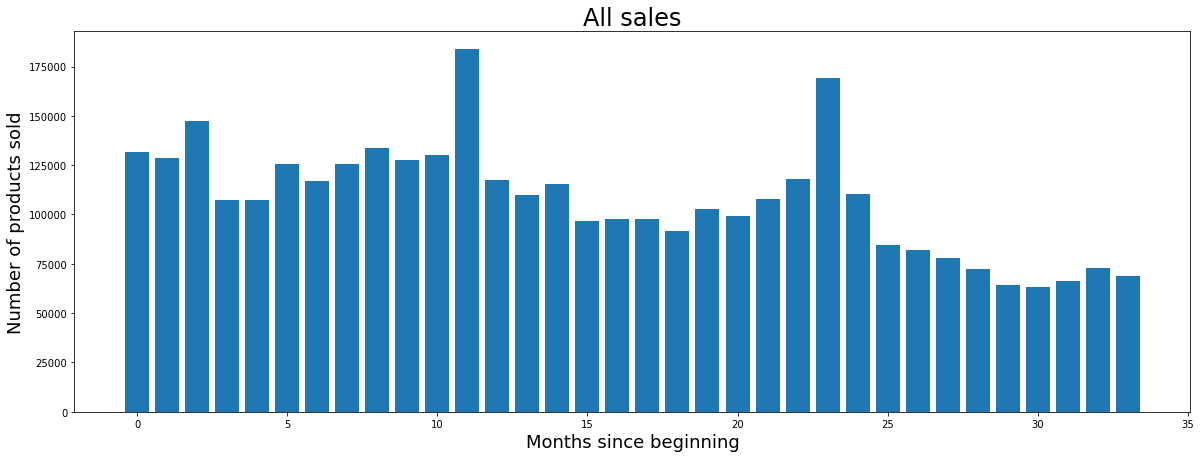

In [67]:
sales_data = getTotalSales()
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 34 artists>

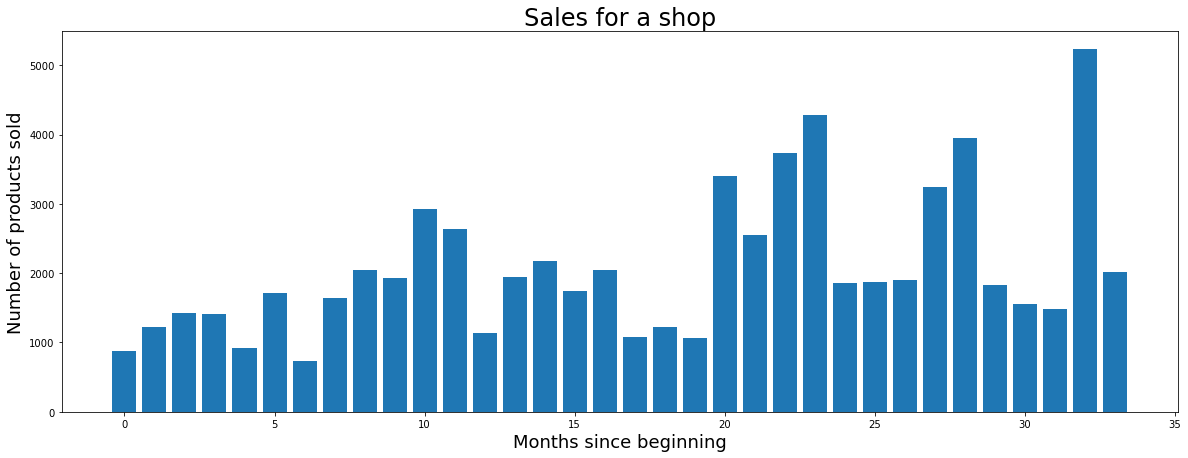

In [68]:
sales_data = getSalesForShop(12)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("Sales for a shop", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 34 artists>

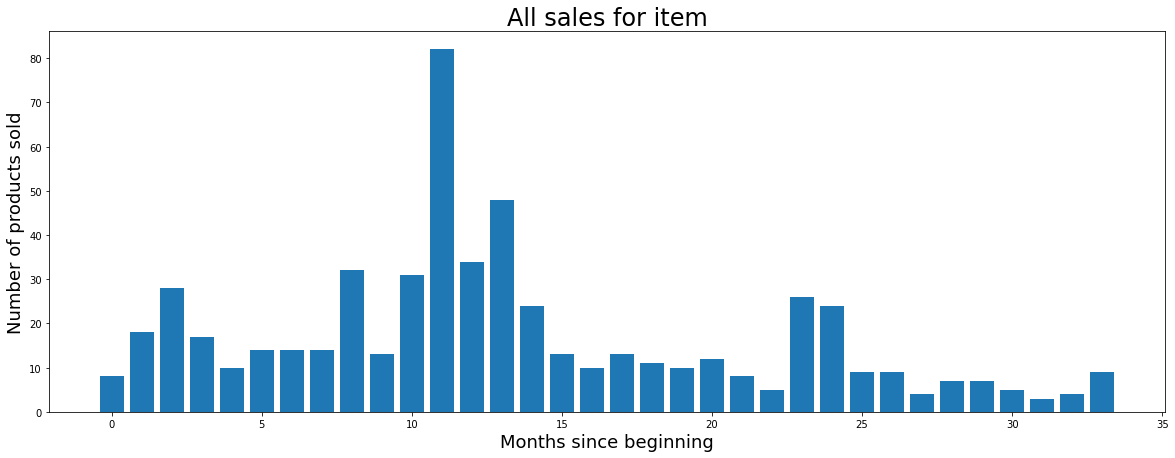

In [69]:
sales_data = getSalesForItem(1010)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 34 artists>

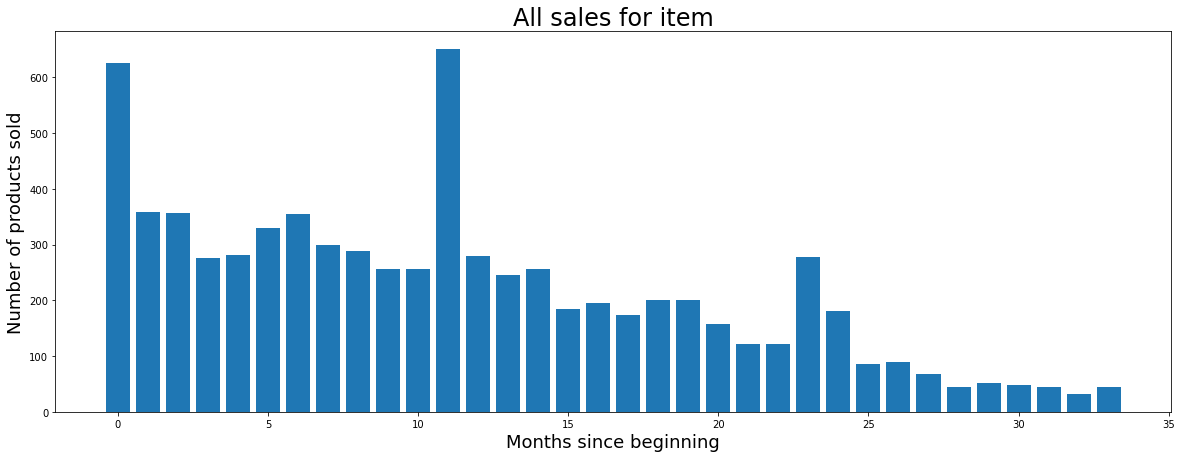

In [70]:
sales_data = getSalesForItemCategory(5)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

<BarContainer object of 25 artists>

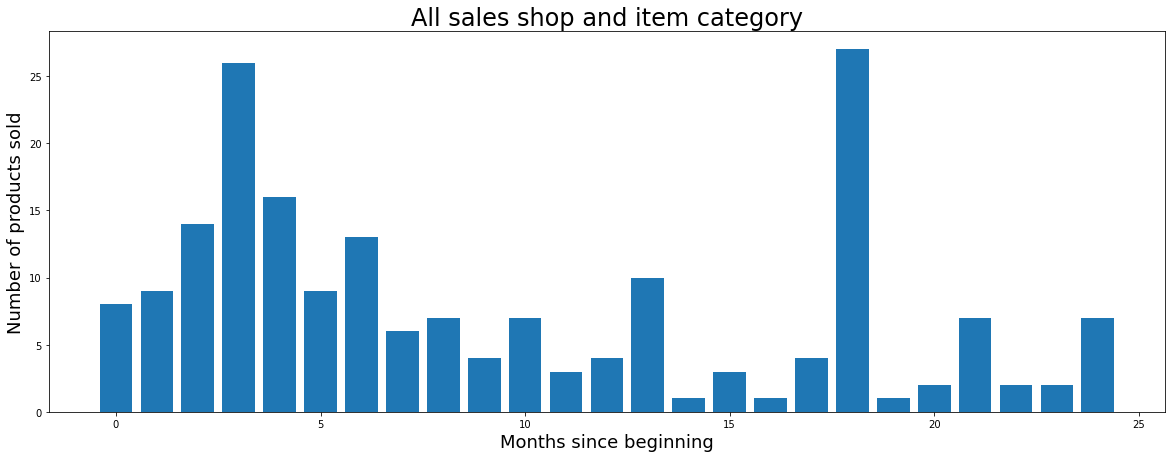

In [71]:
sales_data = getSalesForShopAndItemCategory(15, 25)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item category", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)

date_block_num
0     2.0
1     2.0
3     4.0
5     1.0
6     1.0
7     1.0
13    3.0
14    1.0
17    1.0
20    1.0
23    1.0
Name: item_cnt_day, dtype: float64


<BarContainer object of 11 artists>

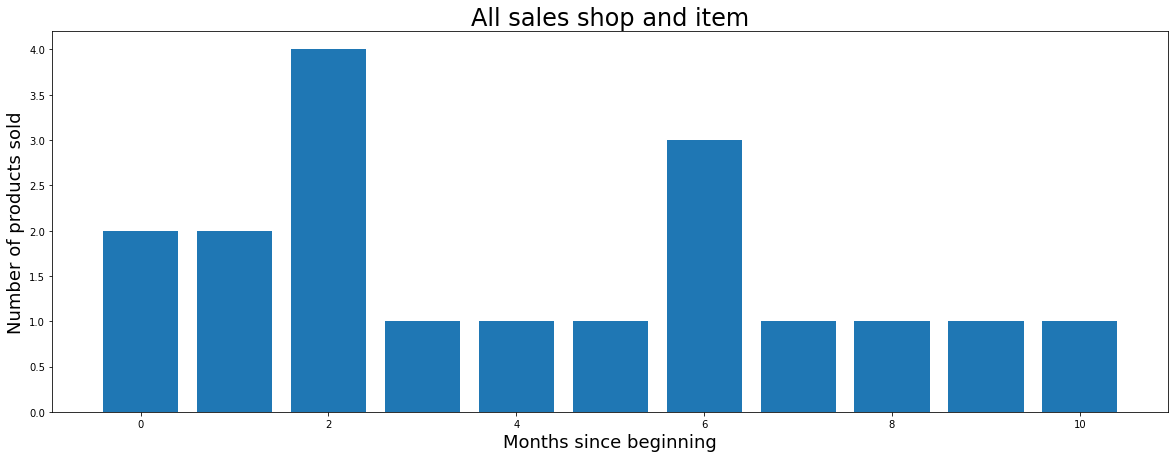

In [72]:
sales_data = getSalesForShopAndItem(15, 1025)
print(sales_data)
x = range(0,len(sales_data))
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.bar(x, sales_data)